Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset.
Determine the number of clusters using the elbow method.
Dataset link : https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns


In [10]:

# Step 1: Load the dataset
df = pd.read_csv('sales_data_sample.csv',encoding='latin1')



In [ ]:
# Step 2: Preprocess the data
# For clustering, let's select relevant columns: OrderLineNumber and Sales
# You can adjust this to use other features if needed
df_clustering = df[['ORDERLINENUMBER', 'SALES']]




In [12]:
# Handle missing values (if any)
df_clustering = df_clustering.dropna()



In [13]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)


In [14]:

# Step 3: Use the Elbow Method to determine the optimal number of clusters for K-Means
wcss = []  # List to store the WCSS values for different values of k
for i in range(1, 11):  # Testing k from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


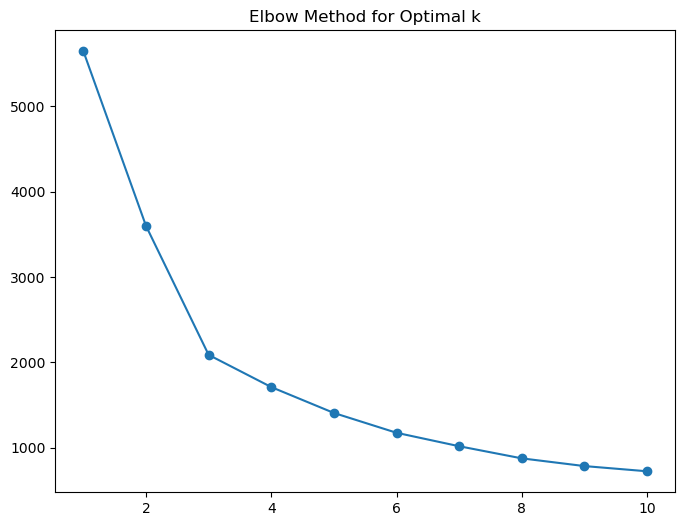

In [ ]:

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.show()

In [19]:
# Step 4: Apply K-Means clustering (assuming optimal k=4 based on the elbow method)
optimal_k = 3 # You should adjust this based on the elbow plot result
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)



In [20]:
# Step 5: Apply Hierarchical Clustering
Z = linkage(scaled_data, method='ward', metric='euclidean')



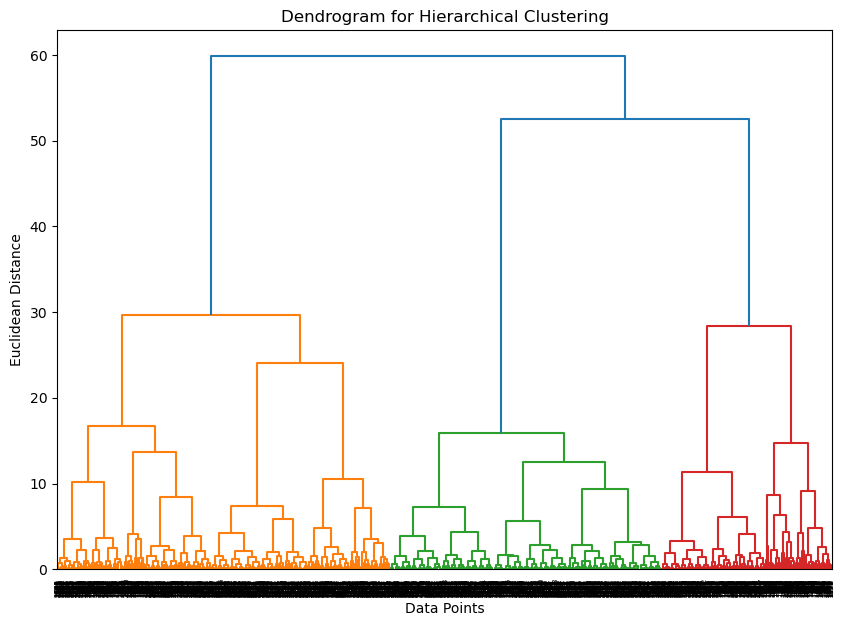

In [21]:
# Plot the Dendrogram to decide on the number of clusters for Hierarchical Clustering
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()